#**Clasificación binaria o regresión logística**

A diferencia de lo que sugiere su nombre, no es un problema de regresión en sí, sino un problema de clasificación. Se llama regresión logística porque su formulación matemática se asemeja mucho a la de la regresión lineal. Este algoritmo se utiliza para realizar clasificaciones binarias, donde solo hay dos clases posibles, o clasificaciones multiclase, con más de dos clases. Por ejemplo, en una clasificación binaria, la regresión logística se puede aplicar para detectar si un correo electrónico es spam o no, o para clasificar un tumor como maligno o benigno.

En esta actividad, el objetivo es utilizar la regresión logística para determinar si un paciente presenta diabetes en función de un conjunto de variables médicas y demográficas. Con la ayuda del instructor, aprenderás a aplicar la regresión logística para resolver problemas de clasificación binaria, desarrollarás habilidades en la interpretación de modelos de clasificación y mejorarás tu capacidad para utilizar técnicas de aprendizaje automático en contextos médicos reales.

**1. Importar librerias y carga de datos:**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EUREKA/DATASET/diabetes.csv')
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**2. Limpieza de datos:**

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


data.info()

🧾 ¿Qué muestra?

Al ejecutar data.info() en una tabla (DataFrame), obtendrás:

Índice: Rango del índice (por ejemplo, RangeIndex: 100 entries, 0 to 99).

Columnas: Número total de columnas.

Nombre de cada columna.

Cantidad de valores no nulos por columna.

Tipo de dato de cada columna (int64, float64, object, etc.).

Uso de memoria aproximado.



In [ ]:
numerical_column_names = data.select_dtypes(include=['number']).columns
print("Numerical Column Names:", numerical_column_names.tolist())

Numerical Column Names: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


1. . data.select_dtypes(include=['number'])

Selecciona solo las columnas que tienen datos numéricos (int64, float64, etc.).

2. .columns

Devuelve el índice (Index) de los nombres de columnas seleccionadas.

3. .tolist()

Convierte ese índice en una lista de Python.

4. print(...)

Muestra en pantalla los nombres de las columnas numéricas.

In [ ]:
object_column_names = data.select_dtypes(include=['object']).columns
print("Object Column Names:", object_column_names.tolist())

Object Column Names: []


data.select_dtypes(include=['object'])

Filtra las columnas que tienen tipo de dato object (por ejemplo: nombres, ciudades, etc.).

.columns
Devuelve los nombres de esas columnas como un Index.

.tolist()
Convierte ese Index en una lista de Python.

print(...)
Muestra los nombres de las columnas tipo objeto.

In [ ]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


¿Qué hace?

data.describe()
Calcula estadísticas descriptivas solo para columnas numéricas por defecto:

count: cantidad de valores no nulos

mean: media

std: desviación estándar

min: mínimo

25%, 50%, 75%: percentiles (cuartiles)

max: máximo

.T
Transpone la tabla: convierte filas en columnas y columnas en filas, para facilitar la lectura.

In [ ]:
print(data[data['Pregnancies'] == 0].shape)
print(data[data['Glucose'] == 0].shape)
print(data[data['Glucose'] == 0].shape)
print(data[data['BloodPressure'] == 0].shape)
print(data[data['SkinThickness'] == 0].shape)
print(data[data['Insulin'] == 0].shape)
print(data[data['BMI'] == 0].shape)

(111, 9)
(5, 9)
(5, 9)
(35, 9)
(227, 9)
(374, 9)
(11, 9)


El código imprime la cantidad de filas del DataFrame data que tienen valor igual a 0 en ciertas columnas clave. Es muy útil para detectar valores anómalos o ausentes codificados como cero, especialmente en datasets médicos como el de diabetes (como el famoso Pima Indians Diabetes Dataset).

Aquí, las características con más ceros son la presión arterial, el grosor de la piel, la insulina y el IMC. Entre ellas, la insulina tiene la mayor cantidad de ceros, mientras que el IMC tiene la menor cantidad.



In [ ]:
data =data.loc[(data[['Glucose', 'BloodPressure', 'BMI']] != 0).all(axis=1)]
data.loc[data['SkinThickness'] == 0, 'SkinThickness'] = data['SkinThickness'].mean()
data.loc[(data['Insulin'] != 0), 'InsulinKnown'] = 1
data.loc[(data['Insulin'] == 0), 'InsulinKnown'] = 0

Ese fragmento de código con pandas está limpiando el DataFrame data y generando una nueva variable útil para análisis posteriores.

Crea una nueva columna llamada InsulinKnown, que indica si se tiene o no un valor válido de insulina:

1 si se conoce (Insulin ≠ 0)

0 si no se conoce (Insulin = 0)

Esto es muy útil como variable binaria auxiliar para modelos de predicción o análisis de patrones de datos faltantes.

In [ ]:
data.columns

#devuelve un objeto Index con los nombres de todas las columnas del DataFrame data.


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'InsulinKnown'],
      dtype='object')

In [ ]:
data = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'InsulinKnown', 'Outcome']]

In [ ]:
list(data.columns)

# obtienes una lista de Python con los nombres de todas las columnas de tu DataFrame data.

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'InsulinKnown',
 'Outcome']

In [ ]:
data.isnull().sum()
# te da un resumen de los valores nulos (NaN) por columna en tu DataFrame data.


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
InsulinKnown,0
Outcome,0


In [ ]:

data.duplicated().sum()
# sirve para contar cuántas filas duplicadas existen en tu DataFrame data.

np.int64(0)

In [ ]:
print("Data Size:",data.shape)

#te muestra las dimensiones del DataFrame data, es decir:

#Número de filas (observaciones)

#Número de columnas (variables)

Data Size: (724, 9)


In [ ]:
cor_mat= data.corr()
cor_mat


,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,InsulinKnown,Outcome
Pregnancies,1.000000,0.134915,0.209668,0.013755,0.012342,-0.025996,0.557066,-0.182693,0.224417
Glucose,0.134915,1.000000,0.223331,0.166683,0.223276,0.136630,0.263560,0.026343,0.488384
BloodPressure,0.209668,0.223331,1.000000,0.137467,0.287403,-0.000075,0.324897,-0.152591,0.166703
SkinThickness,0.013755,0.166683,0.137467,1.000000,0.554488,0.148672,0.031134,0.227211,0.188716
BMI,0.012342,0.223276,0.287403,0.554488,1.000000,0.154858,0.020835,0.097719,0.299375
DiabetesPedigreeFunction,-0.025996,0.136630,-0.000075,0.148672,0.154858,1.000000,0.023098,0.157978,0.184947
Age,0.557066,0.263560,0.324897,0.031134,0.020835,0.023098,1.000000,-0.229760,0.245741
InsulinKnown,-0.182693,0.026343,-0.152591,0.227211,0.097719,0.157978,-0.229760,1.000000,-0.028114
Outcome,0.224417,0.488384,0.166703,0.188716,0.299375,0.184947,0.245741,-0.028114,1.000000


Calcula la matriz de correlación para todas las columnas numéricas del DataFrame data.

¿Qué es una matriz de correlación?

Una matriz de correlación muestra cómo se relacionan entre sí las variables numéricas. Se mide con el coeficiente de correlación de Pearson, que varía entre:

+1 → correlación positiva perfecta

0 → sin correlación

–1 → correlación negativa perfecta

**3. Análisis visual de los datos:**

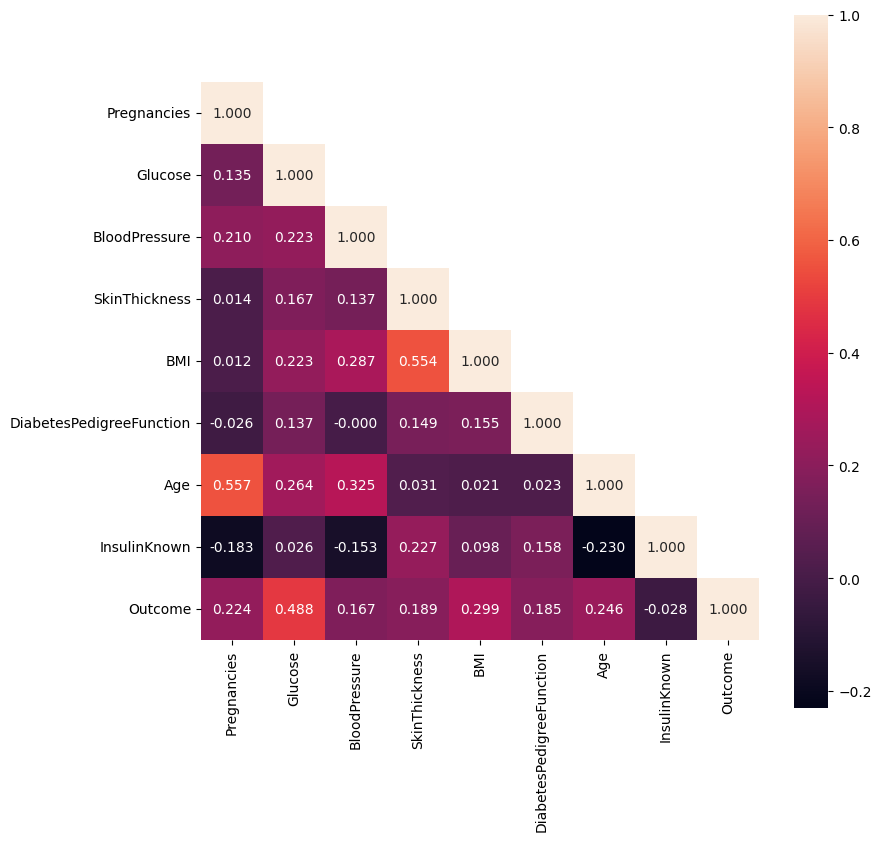

In [ ]:
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(9, 9)
sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cbar=True, fmt=".3f")

plt.show()

Ese fragmento de código crea un mapa de calor (heatmap) de la matriz de correlación, pero mostrando sólo la mitad superior (triángulo superior), lo cual es muy útil para evitar duplicación visual ya que las matrices de correlación son simétricas.

**4. Preparación de los datos para el modelo**

In [ ]:
X = data.drop(['Outcome'], axis = 1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 101)

scaler = RobustScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


1. Separar variables independientes (X) y dependiente (y)
X = data.drop(['Outcome'], axis=1)
y = data['Outcome']


X contiene todas las columnas excepto Outcome (es decir, las variables predictoras).

y contiene la columna Outcome, que es la variable objetivo/clase (por ejemplo, si una persona tiene diabetes o no).

2. Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=101)


Divide los datos en 90% entrenamiento y 10% prueba.

random_state=101 asegura que la partición sea reproducible.

3. Escalar los datos con RobustScaler
scaler = RobustScaler()
scaler.fit(X_train)


RobustScaler es excelente cuando hay outliers (valores extremos), ya que escala usando la mediana y el rango intercuartílico (IQR).

Se entrena (ajusta) solo con los datos de entrenamiento, lo cual es correcto.

4. Transformar los conjuntos de entrenamiento y prueba
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


Aplica la transformación a X_train y X_test, dejando ambos escalados de forma consistente.

📌 Resultado final:

Ahora tienes:

X_train_scaled: datos de entrenamiento escalados

X_test_scaled: datos de prueba escalados

y_train, y_test: etiquetas correspondientes

**5. Entrenamiento**



In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

Este código entrena el modelo de Regresión Logística

La Regresión Logística es un algoritmo de clasificación supervisado que predice la probabilidad de que una observación pertenezca a una clase (en este caso,  Outcome = 0 o 1, por ejemplo: no diabético / diabético).

In [ ]:
score = model.score(X_test_scaled, y_test)
score

0.863013698630137

Estás calculando el accuracy (precisión) del modelo de regresión logística sobre el conjunto de prueba.

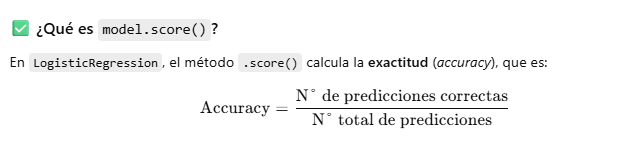

**6. Predicción:**

In [ ]:
X_train.head(1)


,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,InsulinKnown
409,1,172,68,49.0,42.4,0.702,28,1.0


Muestra la primera fila del conjunto de entrenamiento X_train antes del escalado.

✅ ¿Para qué sirve?

Verificar los valores originales de las variables predictoras (no escaladas).

Útil para comparar contra X_train_scaled[0], que es la versión transformada de esa misma fila tras usar RobustScaler.

In [ ]:
import pandas as pd

# Crear vector con todas las columnas requeridas
vector_prueba = {
    'Pregnancies': 1,
    'Glucose': 172,
    'BloodPressure': 68,
    'SkinThickness': 49,
    # 'Insulin': 85,  # agregado
    'BMI': 42.4,
    'DiabetesPedigreeFunction': 0.70,
    'Age': 28,
    'InsulinKnown': 1
}

vector_prueba = pd.DataFrame(vector_prueba, index=[0])

# Escalar el vector con el scaler entrenado
vector_prueba_scaled = scaler.transform(vector_prueba)

# Realizar la predicción
prediccion = model.predict(vector_prueba_scaled)[0]
print("Predicción (0 = no diabetes, 1 = diabetes):", prediccion)

Predicción (0 = no diabetes, 1 = diabetes): 1


La conclusión es que el paciente con esos datos de prueba SI tiene diabetes.